<a href="https://colab.research.google.com/github/Giopass/network-science/blob/main/Network_science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1: Importing Necessary Libraries**

In this initial step, we import the Python libraries required for our project. Each library serves a specific purpose, enabling us to fetch and process Reddit data efficiently.

- **Pandas (pd)**: The `pandas` library is used to manipulate and analyze data. It provides data structures like DataFrames, which are ideal for handling tabular data such as posts or comments retrieved from Reddit.

- **Time**: The `time` module enables us to introduce delays in our code using `time.sleep()`. This is critical when interacting with Reddit's API to prevent overwhelming the server and to comply with rate limits.

- **TQDM**: The `tqdm` library is used to create progress bars for loops. It helps visualize the progress of tasks such as downloading posts or extracting comments, making it easier to track long-running operations.

- **PRAW (Python Reddit API Wrapper)**: The `praw` library simplifies interactions with Reddit's API. It provides an intuitive interface to retrieve posts, comments, and other Reddit data.

- **PRAW Exceptions**: The `praw.exceptions` module includes error classes for handling specific issues that might arise during API interactions, such as rate limits or connection errors.


In [1]:
import pandas as pd
import time
import os
from tqdm.auto import tqdm

!pip install -q praw
import praw
import praw.exceptions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 2: Create a Reddit application and obtain API credentials

1. **Go to Reddit's App Preferences**:  
   [Click here to open Reddit App Preferences](https://www.reddit.com/prefs/apps).

2. **Create a New Application**:
   - Ensure you’re **logged in** to your Reddit account.
   - Scroll down to the section titled **"Developed Applications"**.
   - Click on the **"Create App" or "Create Another App"** button.

3. **Fill in Application Details**:
   - **Name**: Enter a name for your application, such as "Reddit Data Downloader".
   - **App Type**: Select **"script"** (for personal, non-distributed use).
   - **Description**: Write a short description (e.g., "An app to download Reddit data").
   - **About URL**: Leave this blank unless you have a website for your app.
   - **Redirect URI**: Enter a redirect URI (e.g., `http://localhost:8080`).
   - **Permissions**: Leave as default.

4. **Create the Application**:
   - After filling in all fields, click **"Create app"**.

5. **Retrieve Your Credentials**:
   - **client_id**: This alphanumeric string is located directly under the application name.
   - **client_secret**: Found in the application details and labeled as "secret".

   Save these credentials securely, as they are needed to authenticate your API requests.

6. **Authenticate with the Reddit API**:
  To access Reddit's data programmatically, we need to authenticate our Python application using the praw library.
  
  reddit = praw.Reddit(...): creates a Reddit API client object named reddit. This object is used for making authenticated requests to the Reddit API. The constructor takes the following parameters:
  - **client_id**: as from step 5; it's used to identify your application when making API requests.
  - **client_secret**: as from step 5; it's a secret key that, when combined with the client ID, allows your application to securely authenticate with the Reddit API.
  - **user_agent**: The user agent is a string that identifies your application and its purpose. It's important to provide a user agent that follows Reddit's guidelines, typically including the name of your application and a version number. For personal projects, you can include your Reddit username or any other descriptive information.

  With this authenticated reddit object, we can now access various Reddit data and perform operations like fetching posts, comments, and more, which will be an essential part of our project. ```

In [3]:
# IN HERE YOU CAN CHANGE YOUR DIRECTORY
output_dir = '/content/drive/MyDrive/NS/reddit_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


reddit = praw.Reddit(
    client_id = '9AkNcQ17Z5pi_zo36Qrr6g',
    client_secret = 'bTQxJR7g2NVrYQZ1kNT1iipeMIGckA',
    user_agent = 'Dry_Try8800',
    check_for_async = False
)



#### Step 3: Search for Subreddits Related to the Hashtag
The `reddit.subreddits.search_by_name` method is used to search for subreddits based on the user-provided hashtag or keyword. The following parameters are used:
- `hashtag`: The keyword entered by the user to find relevant subreddits.
- `include_nsfw=False`: Ensures that NSFW (Not Safe for Work) subreddits are excluded from the results.
- `exact=False`: Allows for partial matching, which makes the search more flexible by including subreddits that contain the keyword in their name.

The list of subreddits returned by the search is converted into a Python list, and the top 5 results are selected using slicing (`[:5]`).
- If no results are found, the program exits with a message indicating that no subreddits matched the input.
- If results are found, the script iterates through the top 5 subreddits using Python's `enumerate` function to display the subreddit names and descriptions in a numbered list format. This allows the user to view the best matches and select their preferred subreddit for further processing.


In [4]:
# keyword = "vegan"  # Keyword to search for related subreddits

veganSubs = list(["vegan","eatcheapandvegan","veganrecipes","veganfitness","veganbaking"])
controlSubs = list(["food", "FoodPorn", "foodhacks", "nutrition", "Cooking", "recipes"])
nonVeganSubs = list(["meat", "zerocarb", "carnivore", "carnivorediet", "antivegan"])

print("\n list subreddits related to your subject:")
for i, subreddit in enumerate(veganSubs):
    # Display the subreddits with their names
    print(f"{i + 1}. {subreddit}")



 list subreddits related to your subject:
1. vegan
2. eatcheapandvegan
3. veganrecipes
4. veganfitness
5. veganbaking


### **Revised Explanation for Step 4: Downloading Reddit Posts and Saving to CSV**

This code retrieves a specific number of top-rated posts from the `ItalyTravel` subreddit and saves them to a CSV file. The file contains detailed information about each post, including its title, author, and other metadata.

1. **Define the Search Settings**:
   - **Subreddit**: The `subreddit_name` variable is set to `'ItalyTravel'`, focusing the search on posts related to travel within Italy.
   - **Total Posts**: The `total_posts_to_retrieve` variable specifies the maximum number of posts to collect, which in this case is 1,000.
   - **Time Filter**: The `time_filter` variable is set to `'year'`, limiting the search to posts from the past year.

2. **Initialize an Empty List for Storing Data**:
   - An empty list named `all_posts` is created to store the collected data.
   - Each post's details will be stored as a dictionary in this list, making it easy to convert into a pandas DataFrame later.

3. **Retrieve and Store Each Post’s Data**:
   - The code uses the `subreddit.top()` function to fetch posts based on their upvote score. The `time_filter` and `limit` parameters control the time range and the number of posts retrieved, respectively.
   - For each post retrieved, important details are collected, including:
     - **`subreddit`**: The name of the subreddit where the post was published.
     - **`selftext`**: The body text of the post.
     - **`author_fullname`**: The full name of the post's author (or `'N/A'` if unavailable).
     - **`title`**: The title of the post.
     - **`upvote_ratio`** and **`ups`**: The ratio of upvotes and the total number of upvotes the post received.
     - **`created`** and **`created_utc`**: The post's creation time in standard and UTC formats.
     - **`num_comments`**: The total number of comments on the post.
     - **`author`**: The username of the post's author (or `'N/A'` if unavailable).
     - **`id`**: The unique identifier of the post.

   - The collected data for each post is appended to the `all_posts` list.

4. **Alternative Search Options**:
   - The code provides flexibility to retrieve posts using different methods:
     - **`hot()`**: Retrieves currently trending posts.
     - **`search()`**: Searches for posts containing specific keywords (e.g., `'Rome'`) and allows sorting by relevance, top, new, etc.
     - Note: The `search()` function has a practical limit of 250 posts.

5. **Save the Data to a CSV File**:
   - The collected data is converted into a pandas DataFrame using `pd.DataFrame(all_posts)`.
   - To ensure uniqueness, duplicate posts are removed based on their IDs using `df.drop_duplicates(subset='id')`.
   - The cleaned DataFrame is saved to a CSV file named `'ItalyTravel_top_posts.csv'`.

This step generates a structured file containing metadata for up to 1,000 posts from the `ItalyTravel` subreddit, ready for further analysis.

In [5]:
for i in range(len(veganSubs)):
    subreddit_name = veganSubs[i]  # select subreddit name
    total_posts_to_retrieve = 1000  # select number of posts
    time_filter = 'year'  # select among "all", "day", "hour", "month", "week", "year"
    all_posts = []
    subreddit = reddit.subreddit(subreddit_name)
    for post in tqdm(subreddit.top(limit=total_posts_to_retrieve, time_filter=time_filter),
                 # as an alternative to the 'top' function, you can also use the 'hot' function
                 total=total_posts_to_retrieve, desc='Reddit posts'):
      all_posts.append({
          'subreddit': post.subreddit.display_name,
          'selftext': post.selftext,
          'author_fullname': post.author_fullname if post.author else 'N/A',
          'title': post.title,
          'upvote_ratio': post.upvote_ratio,
          'ups': post.ups,
          'created': post.created,
          'created_utc': post.created_utc,
          'num_comments': post.num_comments,
          'author': str(post.author) if post.author else 'N/A',
          'id': post.id
      })

    df = pd.DataFrame(all_posts) # build dataframe
    df.drop_duplicates(subset='id', inplace=True) # drop potential duplicates
    df_sorted = df.sort_values(by='num_comments', ascending=False)
    print(f"Most commented posts in {subreddit_name}:")
    print(df_sorted[['title', 'num_comments']].head(100)) # get the most comment posts
    csv_file_path = f'{output_dir}/{subreddit_name}'
    try:
        df_sorted.to_csv(f'{csv_file_path}.csv', index=False) # export to csv
        df_sorted.to_excel(f'{csv_file_path}.xlsx', index=False) # export to excel
        print(f"CSV saved successfully: {csv_file_path}")
    except Exception as e:
        print(f"Error saving CSV for subreddit {subreddit_name}: {e}")
# subreddit_name = 'vegan' # select subreddit name



Reddit posts:   0%|          | 0/1000 [00:00<?, ?it/s]

Most commented posts in vegan:
                                                 title  num_comments
63                      20K likes, we are so fucked...          1136
584       Is there something you’re *not* vegan about?          1113
194               Right-wing vegans, what's your deal?          1105
727  Might be controversial, but what non vegan foo...          1050
12                              Lizzo no longer vegan            966
..                                                 ...           ...
683        Boyfriend made me coffee… with regular milk           400
364              Kristen Bell isn't vegetarian anymore           397
469  Why do does the Carnivore cult ACTUALLY believ...           394
591  Pro life people need to be vegan for their opi...           392
545         What's the hardest part about being vegan?           391

[100 rows x 2 columns]
CSV saved successfully: /content/drive/MyDrive/NS/reddit_data/vegan


Reddit posts:   0%|          | 0/1000 [00:00<?, ?it/s]

Most commented posts in eatcheapandvegan:
                                                 title  num_comments
1      Ideas for what to eat when nothing sounds good.           990
0    Random meals my wife has cooked - whole foods,...           226
44   Need help living off 100 dollars a month(SNAP)...           146
70   Cheapest non-refrigerated foods that don’t nee...           125
99   What are your favorite ways to eat tofu? 3,2,1...           119
..                                                 ...           ...
254                                Eggplant Schnitzel             17
36   Cucumber Salad with Asian Dressing - Smash or ...            17
19      Vegan lentil quinoa soup - a very filling soup            17
570                    Meal ideas for a group of 10-12            17
743                             Vegan recipe creators             17

[100 rows x 2 columns]
CSV saved successfully: /content/drive/MyDrive/NS/reddit_data/eatcheapandvegan


Reddit posts:   0%|          | 0/1000 [00:00<?, ?it/s]

Most commented posts in veganrecipes:
                                                 title  num_comments
96   What is the one vegan recipe that you made mor...           297
428                Non vegan trying to impress a vegan           232
692                            Vegan as a poor person            232
246  Rant/unpopular opinion: Seitan isn't that good...           209
845            Vegan cheese that actually tastes good?           196
..                                                 ...           ...
368  What is this type of fluffy meat-substitute ca...            33
475       small-batch chocolate shortbread cookie cups            33
140                                Dad's yeast waffles            32
38                         Lumpia-Inspired Wonton Cups            32
114  Wild Rice Soup - from my column The Art of Sou...            32

[100 rows x 2 columns]
CSV saved successfully: /content/drive/MyDrive/NS/reddit_data/veganrecipes


Reddit posts:   0%|          | 0/1000 [00:00<?, ?it/s]

Most commented posts in veganfitness:
                                                 title  num_comments
34        32 Vegan for 12 years,natty, how am i doing?           359
121  I am a VEGAN Bodybuilder (who uses PEDs) AMA -...           213
2    I've been vegan for 10 years. I started liftin...           202
169  Anyone else so incredibly sick of them making ...           200
83   "Can't build muscle as a vegan" - 18 year vega...           188
..                                                 ...           ...
148    Vegan for 4 years and feeling good about myself            71
584                                           Creatine            71
942               Is 200g of protein just my life now?            71
794             TVP Bolognese spaghetti (tips needed!)            71
823  No more posts asking about how to get protein....            70

[100 rows x 2 columns]
CSV saved successfully: /content/drive/MyDrive/NS/reddit_data/veganfitness


Reddit posts:   0%|          | 0/1000 [00:00<?, ?it/s]

Most commented posts in veganbaking:
                                                 title  num_comments
4    Some people are so unaware that eggs arent nec...           103
12                              Protect Trans Kids Pie            79
0    The prettiest and ugliest vegan cake I’ve ever...            73
1                     Vegan Christmas Cake order! ❤️🎄✨            65
546                    Eggless cookies keep flattening            64
..                                                 ...           ...
199                               Vegan Levain Cookies            21
733                     The chewiest of chewy cookies?            20
815              Egg substitute for pecan pie filling?            20
351                                    Italian cookies            20
189                Bagel Sandwich w/ homemade Just Egg            20

[100 rows x 2 columns]
CSV saved successfully: /content/drive/MyDrive/NS/reddit_data/veganbaking


In [6]:
df = pd.DataFrame(pd.read_csv(f'{output_dir}/vegan.csv')) # read dataframe
df # display dataframe

,subreddit,selftext,author_fullname,title,upvote_ratio,ups,created,created_utc,num_comments,author,id
0,vegan,NaN,NaN,"20K likes, we are so fucked...",0.66,1222,1.707575e+09,1.707575e+09,1136,NaN,1anhd7w
1,vegan,Just interested to see what people say. \n\nFo...,t2_t63jfiki,Is there something you’re *not* vegan about?,0.72,377,1.722649e+09,1.722649e+09,1113,hearthealthqs,1eir5q6
2,vegan,"Okay, first off, I'm not here to start a fight...",t2_tjhg9gs3,"Right-wing vegans, what's your deal?",0.82,758,1.711244e+09,1.711244e+09,1105,facebace,1bm8tv3
3,vegan,"Not wanting to start anything nasty, honestly ...",t2_9g9rizewx,"Might be controversial, but what non vegan foo...",0.82,326,1.729904e+09,1.729904e+09,1050,secondhandcornbread,1gc9bj6
4,vegan,"""After tests and research, I found that animal...",t2_gbty0dox,Lizzo no longer vegan,0.75,2352,1.728658e+09,1.728658e+09,966,Hot-Berry-623,1g1bhyw
...,...,...,...,...,...,...,...,...,...,...,...
995,vegan,NaN,t2_dy5os,Mexico just put animal welfare into its nation...,0.98,397,1.733939e+09,1.733939e+09,3,FreeAsABird16,1hbz1ma
996,vegan,I saw this posted on tiktok today and for some...,t2_nr49kuor,Vegan adjacent humor,0.98,380,1.733379e+09,1.733379e+09,3,ImportanceMelodic881,1h72kub
997,vegan,NaN,NaN,Dairy decline continues with another regional ...,0.97,335,1.712755e+09,1.712755e+09,2,NaN,1c0l9aw
998,vegan,NaN,t2_k9aoc94rl,Animal Rising protesters who burst through bar...,0.99,301,1.727093e+09,1.727093e+09,1,_FishFriendsNotFood_,1fniu6m


### Revised Explanation for Step 5: Extracting Comments from Reddit Posts

This code extracts comments from Reddit posts retrieved earlier. The process includes handling potential rate limits from Reddit's API and saving the extracted comments to a CSV file. Below is a step-by-step explanation:

1. **Initialize an Empty List**:
   - An empty list, `comments_list`, is created to store the extracted comment data.

2. **Loop Through Posts**:
   - The loop iterates over the first `num_posts` posts in the DataFrame `df`. For each post, its unique ID (`post_id`) is retrieved, which is used to fetch the corresponding submission object from Reddit.

3. **Handle Comments with `try-except`**:
   - A `try-except` block ensures that potential exceptions (e.g., rate limit errors) during comment extraction are handled gracefully.
   - If an exception occurs, the program waits for 1 second (`sleep(1)`) before continuing.

4. **Retrieve All Comments**:
   - The `submission.comments.replace_more(limit=None)` method ensures all comments are retrieved, even those hidden behind Reddit's "load more comments" feature.

5. **Extract Comment Data**:
   - For each comment in the post, the following details are extracted:
     - **`comment_id`**: The unique identifier for the comment.
     - **`parent_id`**: The ID of the parent post or comment to which this comment is replying.
     - **`post_id`**: The ID of the original post to which the comment belongs.
     - **`comment_body`**: The text content of the comment.

6. **Append Data to List**:
   - The extracted data for each comment is added to `comments_list` as a dictionary. This ensures that all comments from multiple posts are stored in a single structure.

7. **Convert to DataFrame**:
   - After processing all posts, the collected comments are converted into a pandas DataFrame named `comments_df`. Each row represents a single comment with its corresponding metadata.

8. **Save to CSV**:
   - The `comments_df` DataFrame is saved as a CSV file named `'ItalyTravel_top_comments.csv'` without an index column.


In [7]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.7 MB/s eta 0:00:00


In [8]:
import emoji

def extract_emojis(text):
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

num_posts = 100
comments_list = []

for i in tqdm(range(num_posts), desc='Reddit comments'):
    post_id = df_sorted.iloc[i]['id']
    submission = reddit.submission(id=post_id)
    try:
        submission.comments.replace_more(limit=None)
        for comment in submission.comments.list():
            comment_body = comment.body
            emojis_in_comment = extract_emojis(comment_body)

            comments_list.append({
                'comment_id': comment.id,
                'parent_id': comment.parent_id,
                'post_id': post_id,
                'comment_body': comment_body,
                'emojis': emojis_in_comment  # Add extracted emojis here
            })
    except Exception as e:
        print(f"Handling replace_more exception: {e}")
        sleep(3)

comments_df = pd.DataFrame(comments_list)

csv_file_path = f'{output_dir}/vegan_comments'
try:
    comments_df.to_csv(f'{csv_file_path}.csv', index=False)
    comments_df.to_excel(f'{csv_file_path}.xlsx', index=False)
    print(f"CSV saved successfully: {csv_file_path}")
except Exception as e:
    print(f"Error saving CSV for subreddit {subreddit_name}: {e}")


Reddit comments:   0%|          | 0/100 [00:00<?, ?it/s]

CSV saved successfully: /content/drive/MyDrive/NS/reddit_data/vegan_comments


In [29]:
from collections import Counter
import re
# Extract all emojis from the dataset
all_emojis = ''.join(comments_df['emojis'])

# Remove all substrings starting with '\U'
cleaned_string = re.sub(r'[\U0001fa77, \U0001f979, 🏼, \U0001faf6, \U0001fae1, \U0001fab7, \U0001faf3, \U0001fae0, \U0001faf0]', '', all_emojis)

print(cleaned_string)

emoji_counts = Counter(cleaned_string)

# Display the most common emojis
print(emoji_counts.most_common(10))

🥺😂😊👀🏳⚧🏳⚧🏳⚧🙌🏳⚧🌱😭😭😭😭✊🤦🏽♂🤣😂😂🙌😂😂😂😅😂🤣🤣😅😂😅😭🤩😂👌😂❤😅😂😅🥺🤮😍🤤🤤🤤✨✨😒❤😆🤩🤞☺🤩🤩🤩💖💕❤❤✨❤❤✨😊😊🙏😊😊❤🙏🙏❤😊❤✨❤😊🙏😊❤❤❤❤❤❤❤😊❤😭😭❤😊❤🎄✨🙏🤍🤧❤😊❤❤🧡😊💖❤😀🙌😋😂✌🌱🏻🍪😋🍋🤤👀😊🎂😍😄😂👌🍪🤤😍😍💚😂🤔🤤😊☹😂🥐👌🤌🤌🥺🌝🤗🤗🤩💙👍🍌🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳😋🤤❤❣❣❣❣☺☺😀😍🧚♀🔥🌱💚🤩🥰😁❤😭🏻🏻🏻🏻❤🥲😁💐🤔😂🤌🏾🥞😁🤗😂🙌🙌🙂😂👇😂🥰🥰🤎🤎🍪🍪😊⭐⭐⭐⭐💐🏆🤩😍😍😍😍😹😹😹😹😹😹😹🥰❤💖❣😅😆😅❤😅✨😢✨😅😅🥰😢🤷🏻♀🌱🌱😓💕🌱😍😍😅😯🥰😊🙏❤💕💕😭😉😉🤤🍋😍❣⭐🌞🍀😋🤩☺😍😍😍💜☺🍪🍪🤣😋🍪🛍🏠❤😋🤣❤🤨😌👍🏽♥😍😅😍🐶🌸💖💗🎂🤤🥳🎊💗😍🔥🔥🔥🔥😍🎉😍🌱✨🎂🙂🎂👏🍰👍😭😭😭😳😳😳😊🤓🙏😊😊🎉🎁🎆⭐🌹😋😂❤😆😆😆😄🤣🤣🥰🥰❤❤🤣🤣🥳🍰🍰🍰🥰🥰🥰😆😆😆😅😅😅😅😅😅😂😂😂❤😁😋👍🙏🙏🥰🥰😊😅😁😊🤗🤗🤗😁😁😅😛🙂😋😂😋💕😅😇👏😊😆🎂😆🤡😆🤤🤤🤤🤤😋🤤🤤😋🤤🎂💖🍀🌞🎁🎈🎉🎂🎂🥳🎉😻😻😻☺😊😂😍😋🤤😢🏾👏👏🥰😍😍😍😊😁😊🍽😍😋😊🤤🤤🤤♥❤🎂🎊🥰😂✌💖💖💖☺😍✌❤😎😊🙏💗😍😍😋😍😍😂😅❤❤😁😊😀💐💖😅🤤🤗🤣😂😊😀🤩🥕😅👌👌👌🤔😁😊🙏☺🤍🙏😁🧐😅😊🙏🤍🤣😊😄🙏🤍😊🙏😊😄🥳🏃🏻♀🏃🏻♀🏃🏻♀😻🎉🥳💙❤❤❤🎁😊🍪💫🤩🙌💗💗🤤😂😂😅💐⭐👍🥞🤗🤜🤛🍴😍😍😍😍🙌🙌🙌🙌🤍👄👌😍😩🤤🤤🤤🤤👌☺😍🌿😅☺🤤😉👏👏🤤😊😊😊😊🎉😊😊❤😍😍😍🤔🥰😅🤓🤤💐⭐😭😭😯🤣🤣😅👀😋😋🎂🥶😋😊😋💙🙌🙏☺😊😻🔥🔥🔥🔥😵💫😵💫😊😊😆😭❤🙃👍🍎🥧👌😏👏😍🎃👏👻🤌😋❤❤❤👻🙏😍😍😍💕😂💖💖💖💕😂🥰🤤😋👀😊😅🤣🙏😭👌😛👌🥲😍😂👍🤤🙏😢😁😍😍☺🤤😂😁💐🙂😊❣😁❤😭👋👋🤷🏾♂🤦🏾♂💐⭐💖🤗✨🥰✨😭🍪🍪🥰😍🤤😋😂🙃😊🤤😭😭😬😵💫☺✊😆😄🤯🤤😔😋🦄🤔🥸😏😮💨😜✨😮😤🧪👩🍳👏
[('❤', 49), ('😊', 48), ('😍', 47), ('😂', 35), ('🤤', 35), ('😅', 30), ('😋', 23), ('😭', 20), ('🙏', 19), ('🥰', 19)]


In [31]:
from collections import Counter
import re
# Extract all emojis from the dataset
all_emojis = ''.join(comments_df['emojis'])

# Remove substrings starting with '\U' only when they are invalid emoji characters
# Previous regex was too broad and removed all emojis
# This regex removes only specific problematic characters:
cleaned_string = re.sub(r'[\U0001fa77\U0001f979\U0001faf6\U0001fae1\U0001fab7\U0001faf3\U0001fae0\U0001faf0]', '', all_emojis)
cleaned_string = re.sub(r'🏼', '', cleaned_string)

# Print the cleaned string to confirm it's not empty
print(f"Cleaned String: {cleaned_string}")
print(f"Length of Cleaned String: {len(cleaned_string)}")

# Print unique characters in cleaned string for inspection
unique_chars = set(cleaned_string)
print(f"Unique Characters: {unique_chars}")

emoji_counts = Counter(cleaned_string)

# Display the most common emojis
print(emoji_counts.most_common(10))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure Symbola.ttf is a valid font file with emoji glyphs
font_path = '/content/drive/MyDrive/Symbola.ttf'
# If font_path is incorrect, provide the correct path

# Try with a built-in font to rule out font issues
# font_path = 'DejaVuSans.ttf'

try:
    emoji_wordcloud = WordCloud(font_path=font_path, width=800, height=400).generate(cleaned_string)
    plt.imshow(emoji_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error generating word cloud: {e}")
    print(f"Is font file present at: {font_path}?")

Cleaned String: 🥺😂😊👀🏳⚧🏳⚧🏳⚧🙌🏳⚧🌱😭😭😭😭✊🤦🏽♂🤣😂😂🙌😂😂😂😅😂🤣🤣😅😂😅😭🤩😂👌😂❤😅😂😅🥺🤮😍🤤🤤🤤✨✨😒❤😆🤩🤞☺🤩🤩🤩💖💕❤❤✨❤❤✨😊😊🙏😊😊❤🙏🙏❤😊❤✨❤😊🙏😊❤❤❤❤❤❤❤😊❤😭😭❤😊❤🎄✨🙏🤍🤧❤😊❤❤🧡😊💖❤😀🙌😋😂✌🌱🏻🍪😋🍋🤤👀😊🎂😍😄😂👌🍪🤤😍😍💚😂🤔🤤😊☹😂🥐👌🤌🤌🥺🌝🤗🤗🤩💙👍🍌🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳🍳😋🤤❤❣❣❣❣☺☺😀😍🧚♀🔥🌱💚🤩🥰😁❤😭🏻🏻🏻🏻❤🥲😁💐🤔😂🤌🏾🥞😁🤗😂🙌🙌🙂😂👇😂🥰🥰🤎🤎🍪🍪😊⭐⭐⭐⭐💐🏆🤩😍😍😍😍😹😹😹😹😹😹😹🥰❤💖❣😅😆😅❤😅✨😢✨😅😅🥰😢🤷🏻♀🌱🌱😓💕🌱😍😍😅😯🥰😊🙏❤💕💕😭😉😉🤤🍋😍❣⭐🌞🍀😋🤩☺😍😍😍💜☺🍪🍪🤣😋🍪🛍🏠❤😋🤣❤🤨😌👍🏽♥😍😅😍🐶🌸💖💗🎂🤤🥳🎊💗😍🔥🔥🔥🔥😍🎉😍🌱✨🎂🙂🎂👏🍰👍😭😭😭😳😳😳😊🤓🙏😊😊🎉🎁🎆⭐🌹😋😂❤😆😆😆😄🤣🤣🥰🥰❤❤🤣🤣🥳🍰🍰🍰🥰🥰🥰😆😆😆😅😅😅😅😅😅😂😂😂❤😁😋👍🙏🙏🥰🥰😊😅😁😊🤗🤗🤗😁😁😅😛🙂😋😂😋💕😅😇👏😊😆🎂😆🤡😆🤤🤤🤤🤤😋🤤🤤😋🤤🎂💖🍀🌞🎁🎈🎉🎂🎂🥳🎉😻😻😻☺😊😂😍😋🤤😢🏾👏👏🥰😍😍😍😊😁😊🍽😍😋😊🤤🤤🤤♥❤🎂🎊🥰😂✌💖💖💖☺😍✌❤😎😊🙏💗😍😍😋😍😍😂😅❤❤😁😊😀💐💖😅🤤🤗🤣😂😊😀🤩🥕😅👌👌👌🤔😁😊🙏☺🤍🙏😁🧐😅😊🙏🤍🤣😊😄🙏🤍😊🙏😊😄🥳🏃🏻♀🏃🏻♀🏃🏻♀😻🎉🥳💙❤❤❤🎁😊🍪💫🤩🙌💗💗🤤😂😂😅💐⭐👍🥞🤗🤜🤛🍴😍😍😍😍🙌🙌🙌🙌🤍👄👌😍😩🤤🤤🤤🤤👌☺😍🌿😅☺🤤😉👏👏🤤😊😊😊😊🎉😊😊❤😍😍😍🤔🥰😅🤓🤤💐⭐😭😭😯🤣🤣😅👀😋😋🎂🥶😋😊😋💙🙌🙏☺😊😻🔥🔥🔥🔥😵💫😵💫😊😊😆😭❤🙃👍🍎🥧👌😏👏😍🎃👏👻🤌😋❤❤❤👻🙏😍😍😍💕😂💖💖💖💕😂🥰🤤😋👀😊😅🤣🙏😭👌😛👌🥲😍😂👍🤤🙏😢😁😍😍☺🤤😂😁💐🙂😊❣😁❤😭👋👋🤷🏾♂🤦🏾♂💐⭐💖🤗✨🥰✨😭🍪🍪🥰😍🤤😋😂🙃😊🤤😭😭😬😵💫☺✊😆😄🤯🤤😔😋🦄🤔🥸😏😮💨😜✨😮😤🧪👩🍳👏
Length of Cleaned String: 759
Unique Characters: {'🎈', '🏳', '😆', '😛', '❤', '🤤', '☹', '🤛', '🤗', '🙂', '💜', '🎂', '✨', '😩', '🤌', '🧪', '💚', '🤡', '😇', '🤔', '😁', '🤯', '😌', '🍌', '⭐', '🥐', '🐶', '🏆', '😻', '🌞', '😮', '💕', '🤨', '🤮', '🍋',

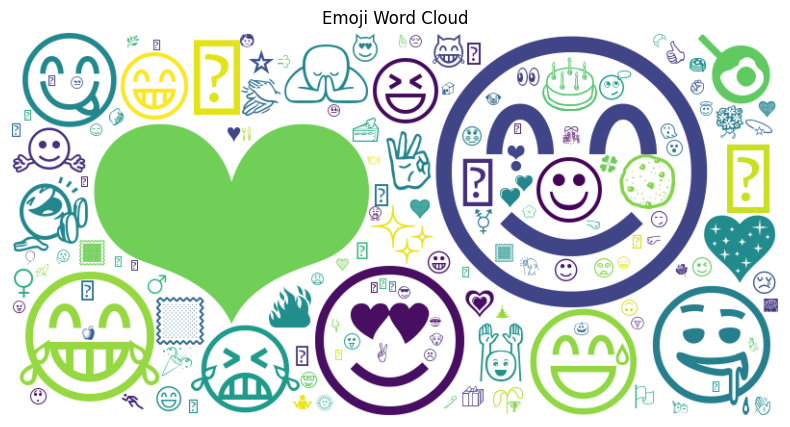

In [40]:
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'comments_df' is a pandas DataFrame containing the column 'emojis'
# Step 1: Extract all emojis from the dataset
all_emojis = ''.join(comments_df['emojis'])

# Step 2: Remove unwanted substrings (if applicable)
# Update the regex pattern based on your needs
cleaned_string = re.sub(r'[\U0001fa77\U0001f979🏼]', '', all_emojis)

# Step 3: Count emoji frequencies
emoji_counts = Counter(cleaned_string)

# Step 4: Generate the word cloud
# Use emoji counts to create a word cloud
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Symbola.ttf',  # You may need an emoji-compatible font
                      width=800,
                      height=400,
                      background_color="white",
                      prefer_horizontal=1.0).generate_from_frequencies(emoji_counts)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Emoji Word Cloud")
plt.show()



In [ ]:
comments_df = pd.DataFrame(pd.read_csv(f'{output_dir}/vegan_comments.csv')) # read dataframe

comments_df # display dataframe